In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
faa1 = pd.read_csv('FAA1.csv')
faa2 = pd.read_csv('FAA2.csv')
print(faa1.describe())
print(faa2.describe())
print(faa1.shape)
print(faa2.shape)
faa=faa1.append(faa2)
print(faa.shape)

## getting the sum of missing values across all columns
faa.isnull().sum()

# Removing outliers-
# We have been given following information regarding which observation can be called an outlier
# 1. The duration of a normal flight should always be greater than 40 min. 
# 2. If Speed_ground is less than 30MPH or greater than 140MPH, then the landing would be considered as abnormal.
# 3. If Speed_air is less than 30MPH or greater than 140MPH, then the landing would be considered as abnormal.
# 4. The landing aircraft is required to be at least 6 meters high at the threshold of the runway. 
# 5. Landing distance should be less than 6000 feet

clean=(faa.duration>40)&(faa.speed_ground>30)&(faa.speed_ground<=140)&(faa.speed_air>30)&(faa.speed_air<=140)&(faa.height>=6)&(faa.distance<6000)

faaclean=faa[clean]
faaclean.describe()





         duration     no_pasg  speed_ground   speed_air      height  \
count  800.000000  800.000000    800.000000  200.000000  800.000000   
mean   154.006538   60.132500     79.541420  103.829471   30.121772   
std     49.259234    7.527169     19.234887   10.411873   10.276169   
min     14.764207   29.000000     27.735715   90.002859   -3.546252   
25%    119.493891   55.000000     65.867417   96.162990   23.337992   
50%    153.948098   60.000000     79.642804  100.993398   30.146745   
75%    188.914911   65.000000     92.325004  109.482752   36.981469   
max    305.621711   87.000000    141.218635  141.724936   59.945964   

            pitch     distance  
count  800.000000   800.000000  
mean     4.018375  1544.520801  
std      0.524816   938.233100  
min      2.284480    34.080783  
25%      3.658035   900.952180  
50%      4.020067  1267.438320  
75%      4.388005  1960.441987  
max      5.926784  6533.047651  
          no_pasg  speed_ground   speed_air      height       p

,distance,duration,height,no_pasg,pitch,speed_air,speed_ground
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2784.491582,150.883009,30.358831,59.825641,4.043093,103.504769,103.429514
std,830.090694,48.153103,9.390589,7.036749,0.561376,9.880376,10.051383
min,1740.901889,45.502779,9.697216,41.000000,2.701924,90.002859,88.687580
25%,2160.970179,115.873633,23.365468,56.000000,3.635799,96.150982,95.275196
50%,2526.474898,149.331306,29.836885,60.000000,4.070322,100.891677,100.754772
75%,3186.297261,185.357756,36.590012,65.000000,4.442416,109.420214,109.574546
max,5381.958862,287.002516,58.227800,80.000000,5.310678,132.911465,132.784677


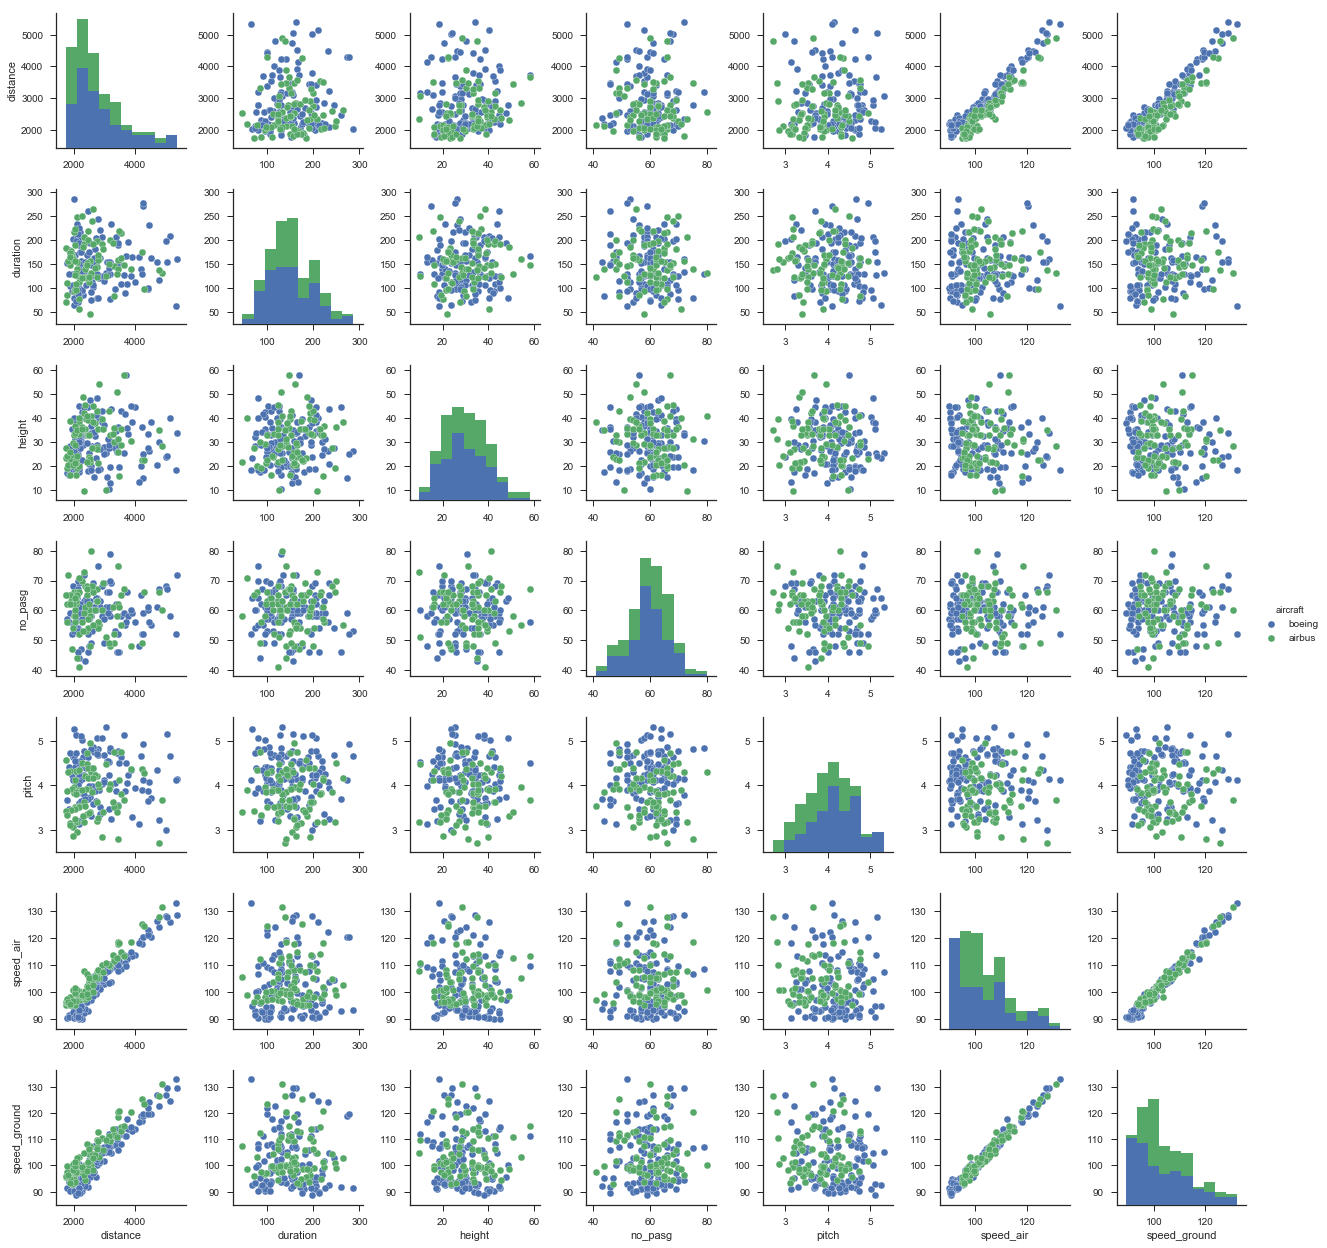

In [30]:
sb.set(style="ticks", color_codes=True)
g=sb.pairplot(faaclean,hue="aircraft")
plt.show()

In [46]:
print(faaclean.dtypes)

## For analysis, we code Airbus as 1, and Boeing as 0
faaclean.loc[faaclean['aircraft'] == 'airbus', 'aircraft'] = 1
faaclean.loc[faaclean['aircraft'] == 'boeing', 'aircraft'] = 0
X=faaclean[['speed_air','aircraft']]
Y=faaclean[['distance']]
X.dtypes
print(type(Y))
print(type(X))

aircraft         object
distance        float64
duration        float64
height          float64
no_pasg         float64
pitch           float64
speed_air       float64
speed_ground    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


/Users/swapnilpatil/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [48]:
# We can see that speed_air and speed_ground are highly correlated with landing distance. However, they are correlated
# with each other as well. 
# We also notice that Aircraft plays a role in deciding the landing distance.
# So our predictors can be Aircraft, Speed_air or Speed_ground
# We are interested in landing distance that exceeds 6000 and there are no missing values in speed_air where landing 
# Distance is higher.  Hence, we will use speed_air

# Now, we need to sample 80% of the randomly selected data for training and rest 20% for testing the model
# for the purpose of reproducing identical results,
X_test, X_train, y_test, y_train=train_test_split(X,Y,test_size=0.8,
                                              random_state=22)

print('Training Dataset size-',X_train.shape)
print('Testing Dataset size-',X_test.shape)
print('Training Dataset Dependent Variable-',y_train.shape)
print('Testing Dataset Dependent Variable-',y_test.shape)

Training Dataset size- (156, 2)
Testing Dataset size- (39, 2)
Training Dataset Dependent Variable- (156, 1)
Testing Dataset Dependent Variable- (39, 1)


In [49]:
reg_model=linear_model.LinearRegression()
reg_model.fit(X_train,y_train)
predictions=reg_model.predict(X_test)
reg_model.coef_

array([[  80.61706332, -434.31821662]])

26131.5281143


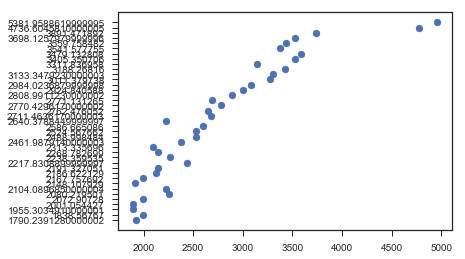

In [53]:
print(mean_squared_error(predictions,y_test))
plt.scatter(predictions,y_test)
plt.show()


In [7]:
## Cross Validation
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
reg.fit(X_train,y_train)
cv_scores=cross_val_score(reg,faaclean[['speed_air']],faaclean.distance,cv=5)
print(np.mean(cv_scores))

NameError: name 'LinearRegression' is not defined